In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import enchant
%matplotlib inline

In [41]:
df = pd.read_csv("compiled_data_toclassify.csv",index_col=None, header=0)
df=df.drop(df.columns[0],1)
#df.dropna(inplace=True)
#df.sort_values(by='diag',inplace=True)

In [42]:
#http://stackoverflow.com/questions/36887743/computing-cosine-similarity-between-all-texts-in-a-corpus
#http://brandonrose.org/clustering

import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

#can also try porterstemmer or lancasterstemmer
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
s = enchant.Dict("en_US")

def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))
#     if not s.check(word):
#         new_words = s.suggest( word )
#         word= new_words[0] 

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english', ngram_range=(1,3), max_df=0.4, max_features=200000, min_df=0.1)

    


In [43]:
slicit=df['response_type']=='asker'
txt = df.loc[slicit,'response'].as_matrix()
cols = [col for col in [col for col in df.columns if 'diag_' in col] if 'sdiag' not in col]
diag = 1*(df.loc[slicit,cols].as_matrix()>0)

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(txt, diag, test_size=0.1, random_state=42)

In [45]:
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

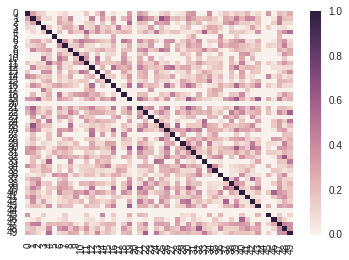

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
sns.heatmap(cosine_similarity(tfidf_train[:50,:50]))

In [47]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(tfidf_train, y_train)
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(tfidf_train, y_train)


predicted = clf.predict_proba(tfidf_test)



In [48]:
for test, pred in zip(y_test, np.array([1-a[:,0] for a in predicted]).T):
    dl = np.array(cols)[test>0].tolist()
    cl = np.array(cols)[pred>0.3].tolist()
    #print('%r => %s' % (dl, cl))

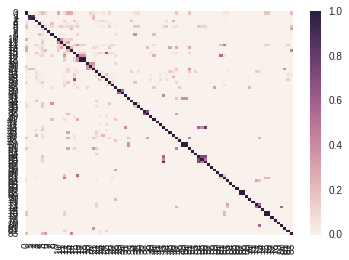

In [49]:
sim = cosine_similarity(diag.T)
sns.heatmap(sim)

In [53]:
for i in range(sim.shape[0]):
    for j in range(i+1,sim.shape[0]):
        if(sim[i,j]>0.2):
            print('%s,%s,%s' % (cols[i].split('_')[1], cols[j].split('_')[1], sim[i,j]))

eczema,contact dermatitis,0.209539519031
eczema,atopic dermatitis,0.271537693321
eczema,psoriasis,0.270765180537
eczema,dry skin,0.271537693321
eczema,xerosis,0.207390338946
angiomas,hemangiomas,0.866025403784
hemangiomas,tinea,0.218217890236
warts,molluscum contagiosum,0.258198889747
intertrigo,dry skin,0.218217890236
intertrigo,xerosis,0.333333333333
urticaria,hives,0.38490017946
urticaria,impetigo,0.204124145232
atopic dermatitis,dermatitis herpetiformis,0.377964473009
dermatitis herpetiformis,psoriasis,0.301511344578
herpes,herpes zoster,0.370479286817
herpes,syphilis,0.469668218314
psoriasis,dry skin,0.227921152919
psoriasis,vitiligo,0.213200716356
psoriasis,stasis dermatitis,0.301511344578
psoriasis,lichen planus,0.269679944985
psoriasis,schamberg's disease,0.301511344578
dry skin,xerosis,0.436435780472
folliculitis,sebaceous cyst,0.656041532496
herpes zoster,shingles,0.377964473009
herpes zoster,varicella,0.377964473009
herpes zoster,impetigo,0.267261241912
herpes zoster,chicken

In [51]:
sim.shape

(84, 84)

In [52]:
pd.DataFrame(cols).sort_values(0)

,0
28,diag_acne
54,diag_allergic contact dermatitis
44,diag_angiokeratoma
1,diag_angiomas
57,diag_angular cheilitis
4,diag_antihistamines
67,diag_aphthous ulcer
10,diag_atopic dermatitis
29,diag_atypical moles
63,diag_balanitis
